# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from numpy import std
import scipy as sc

In [2]:
import seaborn as sns
sns.set_theme()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 20-Iteration


In [4]:
df_scores_20 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/20iter_score.xlsx')
df_177 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/177_score.xlsx')
df_selected = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/selected_models_score.xlsx')

In [5]:
df_selected.shape

(100, 4)

## Histogram of Scores

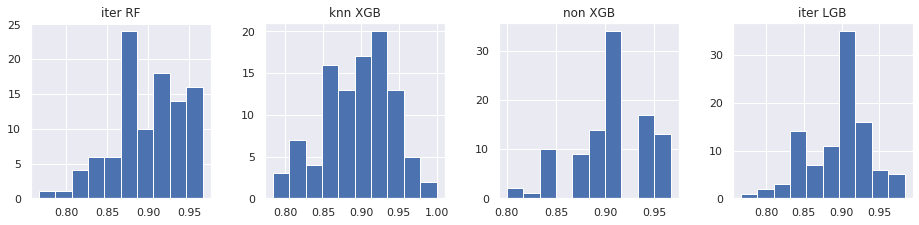

In [6]:
df_selected.hist(figsize=(20,20), layout=(5,5));

In [7]:
df_scores_20.iloc[:,2]

0     0.783333
1     0.850000
2     0.816667
3     0.783333
4     0.766667
        ...   
95    0.800000
96    0.783333
97    0.833333
98    0.783333
99    0.900000
Name: knn SVC, Length: 100, dtype: float64

##SNS Distribution plots

In [15]:
df_scores_20['non']

TypeError: ignored

In [17]:
df_scores_20['non XGB'][df_scores_20['non XGB'] < 1]

0     0.883333
1     0.866667
2     0.833333
3     0.850000
4     0.933333
        ...   
95    0.950000
96    0.966667
97    0.916667
98    0.866667
99    0.950000
Name: non XGB, Length: 100, dtype: float64

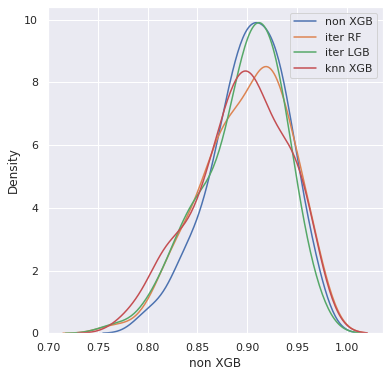

In [23]:
plt.figure(figsize=(6,6))
sns.kdeplot();
sns.kdeplot(df_scores_20['non XGB'][df_scores_20['non XGB'] < 0.97], label='non XGB');
sns.kdeplot(df_scores_20['iter RF'][df_scores_20['iter RF'] < 0.97], label='iter RF');
sns.kdeplot(df_scores_20['iter LGB'][df_scores_20['iter LGB'] < 0.97], label='iter LGB');
sns.kdeplot(df_scores_20['knn XGB'][df_scores_20['knn XGB'] < 0.97], label='knn XGB');
plt.legend()

## Boxplot of Scores

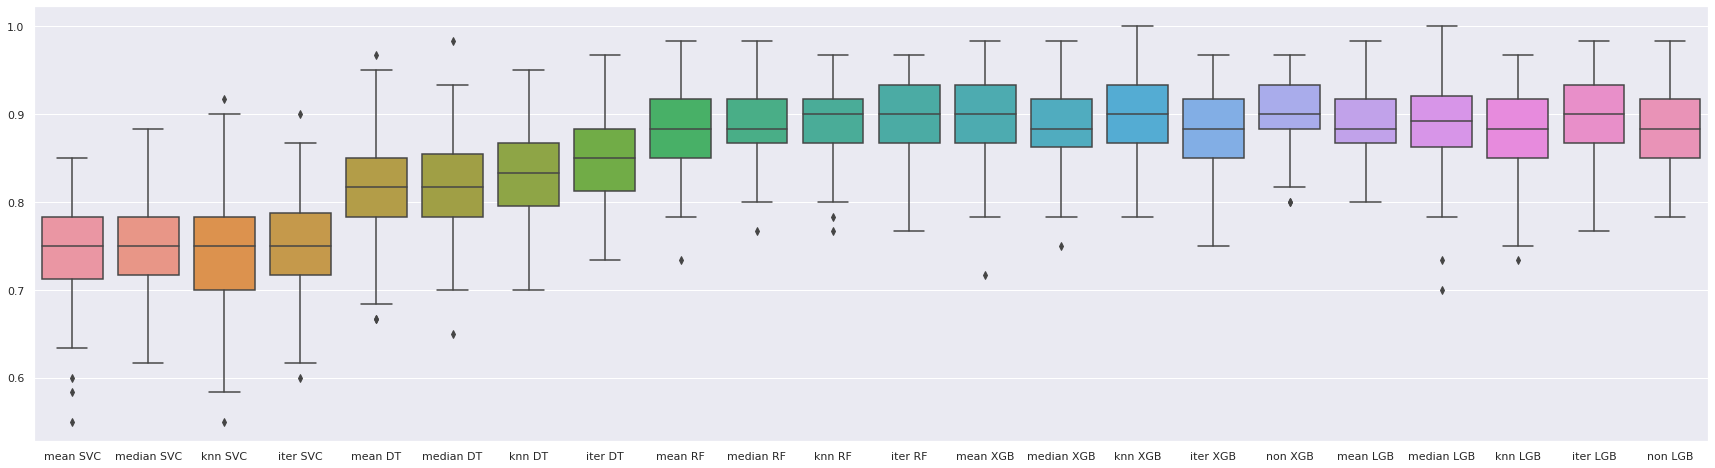

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(data = df_scores_20);

## Violinplot of Scores

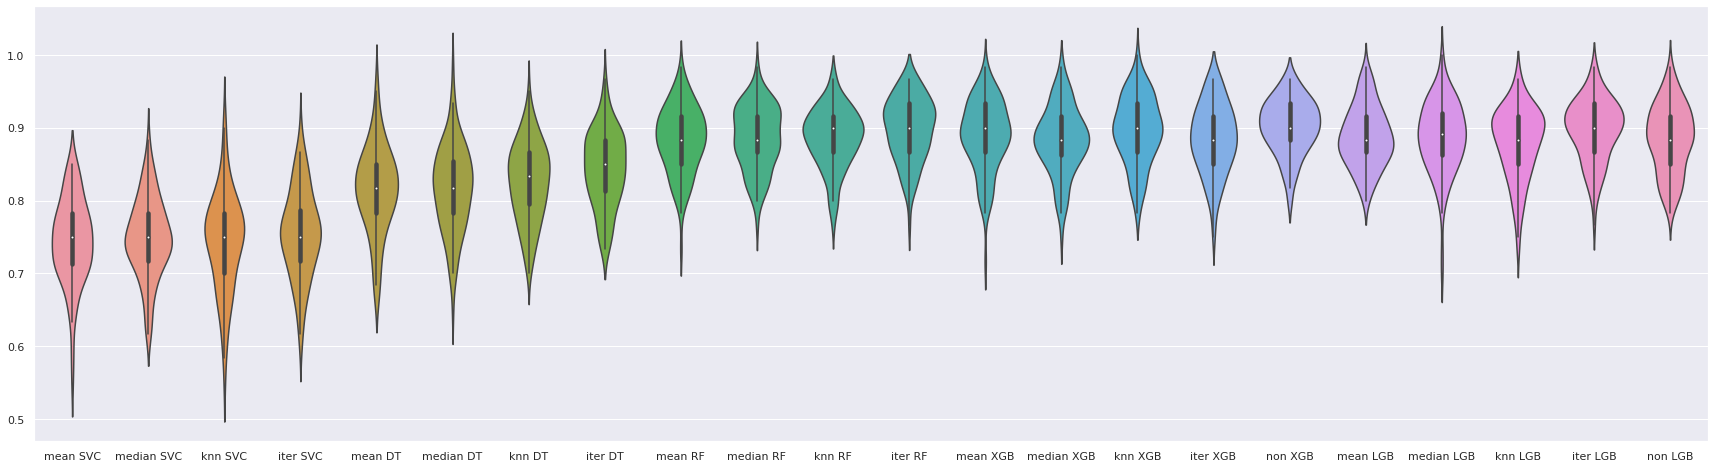

In [ ]:
plt.figure(figsize=(30,8))
sns.violinplot(data = df_scores_20);

## Confidence Interval

###150

In [12]:
df_ci_20 = pd.DataFrame(columns=['Combinations', 'Low', 'High'])
s = 0
for i in df_scores_20.columns:
  scores = df_scores_20[i].values
  mean = scores.mean()
  std = scores.std()
  ci = np.array([sc.stats.t.interval(0.95, len(scores), mean, std)])
  df_ci_20.loc[s] = [i,ci[0][0],ci[0][1]]
  s+=1
df_ci_20

,Combinations,Low,High
0,mean SVC,0.629000,0.860000
1,median SVC,0.640957,0.857043
2,knn SVC,0.610760,0.876573
3,iter SVC,0.635549,0.874451
4,mean DT,0.696617,0.932716
5,median DT,0.699828,0.933172
6,knn DT,0.720237,0.930096
7,iter DT,0.740775,0.945892
8,mean RF,0.793234,0.974099
9,median RF,0.799311,0.972022


In [7]:
df_ci_20 = pd.DataFrame(index=['Low', 'High'], columns=df_scores_20.columns)
for i in df_scores_20.columns:
  scores = df_scores_20[i].values
  mean = scores.mean()
  std = scores.std()
  ci = np.array([sc.stats.t.interval(0.95, len(scores), mean, std)])
  df_ci_20[i][0] = ci[0][0]
  df_ci_20[i][1] = ci[0][1]
df_ci_20

,mean SVC,median SVC,knn SVC,iter SVC,mean DT,median DT,knn DT,iter DT,mean RF,median RF,knn RF,iter RF,mean XGB,median XGB,knn XGB,iter XGB,non XGB,mean LGB,median LGB,knn LGB,iter LGB,non LGB
Low,0.629,0.640957,0.61076,0.635549,0.696617,0.699828,0.720237,0.740775,0.793234,0.799311,0.805058,0.812552,0.792878,0.791263,0.803874,0.789905,0.827213,0.805249,0.789316,0.783257,0.8127,0.792829
High,0.86,0.857043,0.876573,0.874451,0.932716,0.933172,0.930096,0.945892,0.974099,0.972022,0.966609,0.984114,0.984789,0.974404,0.988126,0.979762,0.976121,0.969417,0.985017,0.97541,0.980966,0.976838


1. without XGB
2. iter RF
3. iter LGB
4. knn XGB

---



###177

In [8]:
df_ci_177 = pd.DataFrame(index=['Low', 'High'], columns=df_177.columns)
for i in df_177.columns:
  scores = df_177[i].values
  mean = scores.mean()
  std = scores.std()
  ci = np.array([sc.stats.t.interval(0.95, len(scores), mean, std)])
  df_ci_177[i][0] = ci[0][0]
  df_ci_177[i][1] = ci[0][1]
df_ci_177

,mean LogReg,median LogReg,knn LogReg,iter LogReg,mean SVC,median SVC,knn SVC,iter SVC,mean DT,median DT,knn DT,iter DT,mean RF,median RF,knn RF,iter RF,without XGB,mean LGB,median LGB,knn LGB,iter LGB,without LGB
Low,0.589017,0.598617,0.617957,0.60879,0.627119,0.632192,0.623054,0.634572,0.700847,0.701263,0.695514,0.710101,0.797649,0.781602,0.774878,0.791719,0.792577,0.788158,0.791446,0.777772,0.786835,0.783462
High,0.804223,0.783918,0.791902,0.809238,0.825839,0.817104,0.814692,0.807963,0.90028,0.893385,0.896317,0.894688,0.924604,0.929384,0.911319,0.929408,0.926578,0.929871,0.930525,0.936312,0.941616,0.930905


In [14]:
sns.set_palette(sns.color_palette())

## Lineplot CI

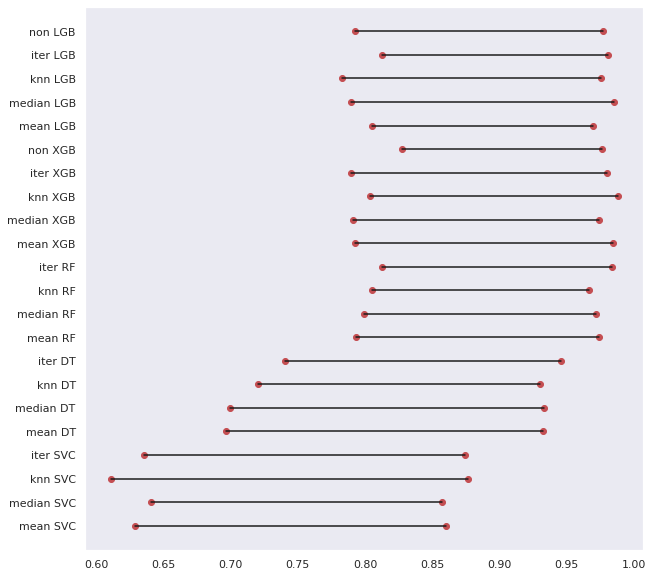

In [15]:
plt.figure(figsize=(10,10))
for i in range(len(df_ci_20)):
  plt.plot([df_ci_20.iloc[i,1],df_ci_20.iloc[i,2]],[i+1,i+1], c='k')
  plt.scatter(df_ci_20.iloc[i,1], i+1, c='r')
  plt.scatter(df_ci_20.iloc[i,2], i+1, c='r')
plt.yticks(range(1,len(df_ci_20)+1), df_ci_20['Combinations'])
plt.grid();

1. without XGB
2. iter RF
3. iter LGB
4. knn XGB

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(df_ci_20)):
  plt.plot([i+1,i+1],[df_ci_20.iloc[i,1],df_ci_20.iloc[i,2]], c='k')
  plt.scatter(i+1, df_ci_20.iloc[i,1],  c='r')
  plt.scatter(i+1, df_ci_20.iloc[i,2], c='r')
plt.xticks(range(1,len(df_ci_20)+1), df_ci_20['Combinations'], rotation=90)
plt.grid();

In [ ]:
# df_ci_20.to_excel("/content/drive/MyDrive/Colab_Notebooks/df_ci_20.xlsx", index=False)

In [ ]:
preicison_150 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/20iter_precision.xlsx')
recall_150 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/20iter_recall.xlsx')
specificity_150 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/20iter_specificity.xlsx')

## 177

In [ ]:
preicison_177 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/177_precision.xlsx')
recall_177 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/177_recall.xlsx')
specificity_177 = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/177_specificity.xlsx')